In [1]:
# Import essential module for this project
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the yearly dataset
yearly_df = pd.read_csv('dataset/yearly_deaths_by_clinic.csv')
yearly_df

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
# Display the total rows and columns
yearly_df.shape

(12, 4)

In [4]:
# Display summary of the yearly dataset
yearly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# Display the total deaths by clinic
yearly_df.groupby('clinic')['deaths'].sum()

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64

The above results shows us the number of deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2.

In [6]:
yearly_df['deaths'] / yearly_df['births'] * 100

0      7.806324
1     15.759051
2      8.954248
3      8.235667
4      6.901489
5     11.446384
6      3.521704
7      7.596841
8      5.987587
9      2.300406
10     2.036409
11     2.797017
dtype: float64

In [7]:
# Calculate proportion of deaths
# To make the analysis easier, we can calculate the proportion of deaths.
yearly_df["proportion_of_deaths"] = yearly_df["deaths"] / yearly_df["births"] * 100

yearly_df

,year,births,deaths,clinic,proportion_of_deaths
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406


In [8]:
# Separate the dataset into 2 datasets, one for each clinic
clinic_1 = yearly_df[yearly_df['clinic'] == 'clinic 1']
clinic_2 = yearly_df[yearly_df['clinic'] == 'clinic 2']

In [9]:
clinic_1

,year,births,deaths,clinic,proportion_of_deaths
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384


In [10]:
clinic_2

,year,births,deaths,clinic,proportion_of_deaths
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406
10,1845,3241,66,clinic 2,2.036409
11,1846,3754,105,clinic 2,2.797017


In [11]:
# yearly_df.plot.bar('year', 'deaths')

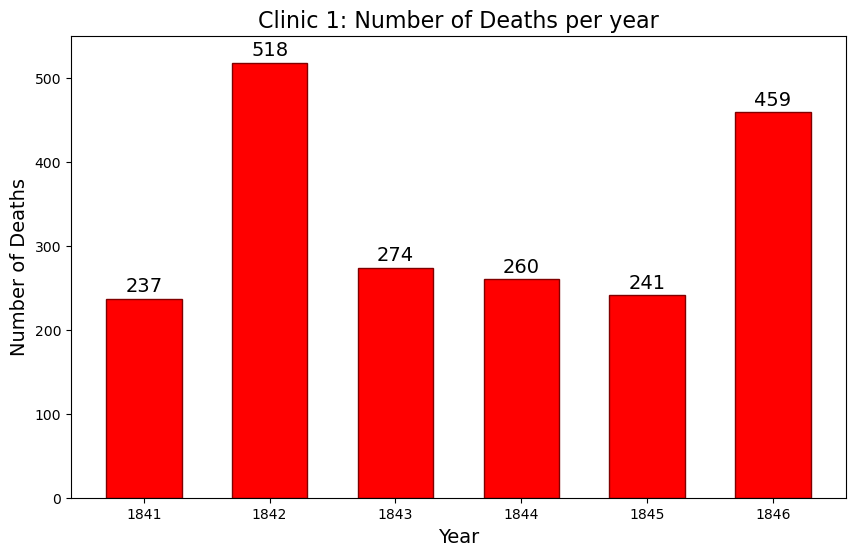

In [12]:
# Visualize the Number of deaths every year in clinic 1
fig, ax = plt.subplots(figsize = (10,6))
barplot = ax.bar(clinic_1.year, clinic_1.deaths, width=0.6, fc='red', ec='maroon')
ax.bar_label(barplot, labels=clinic_1.deaths, label_type='edge', padding=2, fontsize=14)
ax.set_ylim([0, 550])
ax.set_title("Clinic 1: Number of Deaths per year", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Deaths", fontsize=14)
plt.show()

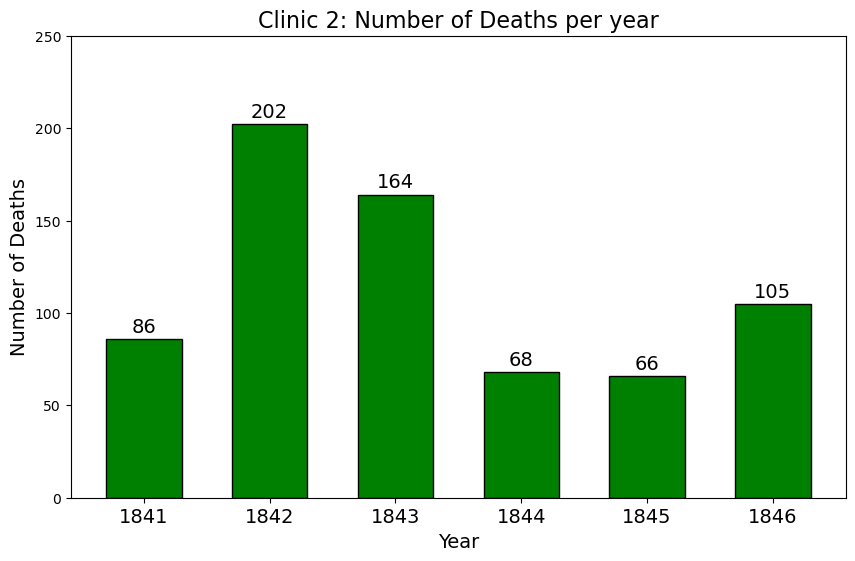

In [13]:
# Visualize the Number of deaths every year in clinic 2
fig, ax = plt.subplots(figsize = (10,6))
barplot = ax.bar(clinic_2.year, clinic_2.deaths, width=0.6, fc='green', ec='black')
ax.bar_label(barplot, labels=clinic_2.deaths, label_type='edge', padding=2, fontsize=14)
ax.set_ylim([0, 250])
ax.set_title("Clinic 2: Number of Deaths per year", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Deaths", fontsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths ware 518 and 202 repectively.

#### Plot he proportion of deaths in clinic 1 and 2

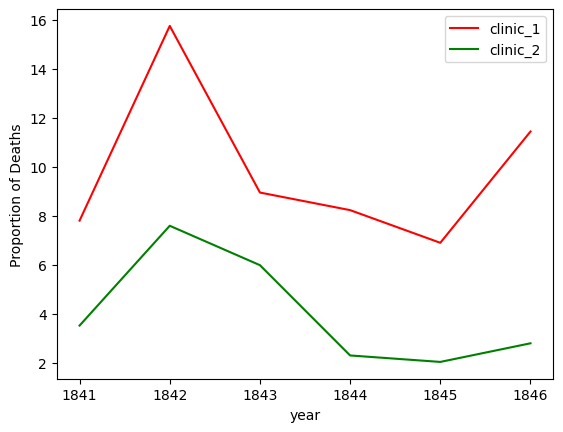

In [14]:
fig, ax = plt.subplots()
ax.plot(clinic_1.year, clinic_1.proportion_of_deaths, label='clinic_1', color='r')
ax.plot(clinic_2.year, clinic_2.proportion_of_deaths, label='clinic_2', color='g')
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('Proportion of Deaths')
plt.show()

In [15]:
# ax = clinic_1.plot(x='year', y='proportion_of_deaths', label='clinic_1', color='red')
# clinic_2.plot(x='year', y='proportion_of_deaths', label='clinic_2', ax=ax, ylabel='Proportion of Deaths', color='green')

**By looking further into why this happend, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autosy room. So, he realized that dealing with corpses spread becteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high motality rates.**

## Monthly data

In [16]:
# Read the monthly dataset
monthly_df = pd.read_csv('dataset/monthly_deaths.csv')
monthly_df.shape

(98, 3)

In [17]:
# Display first five rows of dataframe
monthly_df.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [18]:
# Display summary of monthly dataframe
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [19]:
# Calculate the proportion of deaths per month
monthly_df['proportion_of_deaths'] = monthly_df['deaths'] / monthly_df['births'] * 100
monthly_df.head()

,date,births,deaths,proportion_of_deaths
0,1841-01-01,254,37,14.566929
1,1841-02-01,239,18,7.531381
2,1841-03-01,277,12,4.332130
3,1841-04-01,255,4,1.568627
4,1841-05-01,255,2,0.784314


**Dr semmelweis ordered the doctors to wash their and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started.**

In [20]:
# Display the data types
monthly_df.dtypes

date                     object
births                    int64
deaths                    int64
proportion_of_deaths    float64
dtype: object

In [21]:
# Change the data type to 'data' column from string to datetime
monthly_df['date'] = pd.to_datetime(monthly_df['date'])

In [22]:
# Label the date at which handwashing started to 'start_handwashing'
start_handwashing = pd.to_datetime('1847-06-01')

In [23]:
# Split monthly into before and after handwashing_start
before_washing = monthly_df[monthly_df['date'] < start_handwashing]
after_washing = monthly_df[monthly_df['date'] >= start_handwashing]

### Before Handwashing

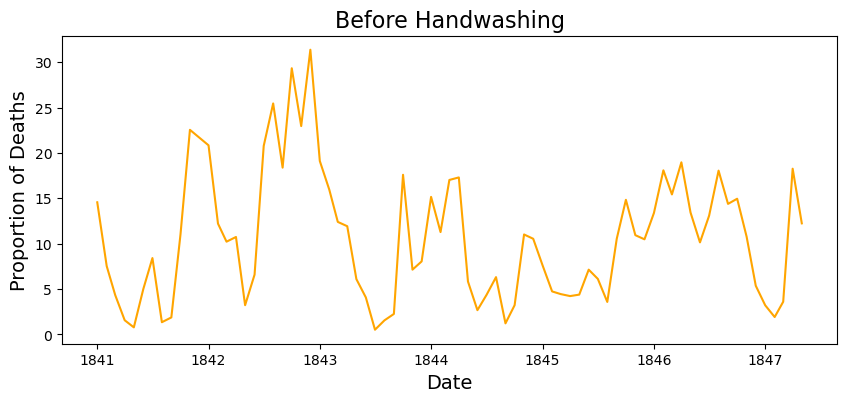

In [24]:
x = before_washing['date']
y = before_washing['proportion_of_deaths']

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y, color='orange')
ax.set_title('Before Handwashing', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Proportion of Deaths', fontsize=14)
plt.show()

### After Handwashing

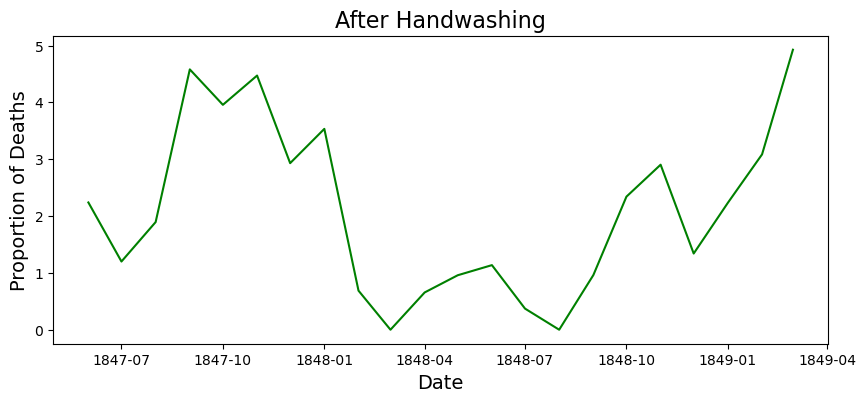

In [25]:
x = after_washing['date']
y = after_washing['proportion_of_deaths']

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y, color='green')
ax.set_title('After Handwashing', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Proportion of Deaths', fontsize=14)
plt.show()

#### To see the defference clearly, let's combine the 2 plots in one chart.

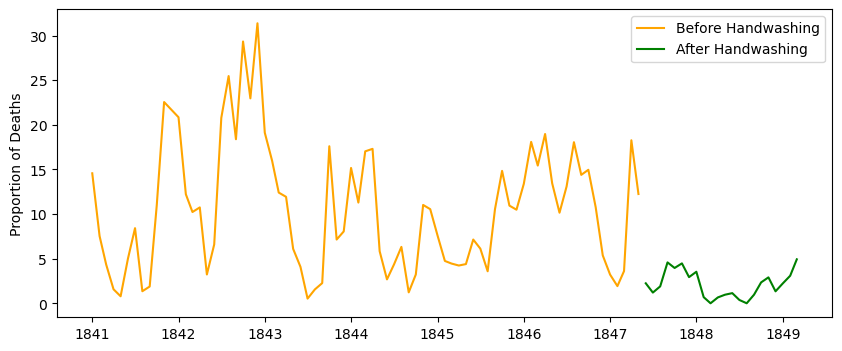

In [26]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(before_washing.date, before_washing.proportion_of_deaths, label='Before Handwashing', color='orange')
ax.plot(after_washing.date, after_washing.proportion_of_deaths, label='After Handwashing', color='green')
ax.set_ylabel('Proportion of Deaths')
ax.legend()
plt.show()

In [27]:
# ax= before_washing.plot(x= "date", y= "proportion_of_deaths", label= "Before Handwashing", color="orange")
# after_washing.plot(x= "date", y= "proportion_of_deaths", label= "After Handwashing", ax=ax, ylabel= "Proportion deaths", color="green")

**The defference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.**

Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

In [28]:
before_proportion = before_washing.proportion_of_deaths
after_proportion = after_washing.proportion_of_deaths

In [29]:
before_proportion.mean()

10.504998260908787

In [30]:
after_proportion.mean()

2.1093375097254534

In [31]:
# Calculate the defference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()

**The minus sign indicate that there is decrease. So handwashing decreased the proportion of deaths from 10% to 2%. i.e, By approximately 8%**